<a href="https://colab.research.google.com/github/Rishita42/Anxiety_Depression_Detector-ML/blob/main/medi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Rishita42/datasets/main/Age_Anx_New%20-%20Copy1.csv")
df.head()
dfx=df

In [ ]:
df.head()

,SID,Age,Gender,Study Field,Level of Study,Year of Study,Staying in hostel,Number of Members in the family,Type of Family,Family Income Level,...,How do you rank the quality of the THEORY courses you received through online classes in last semester compared to offline learning prior COVID and now?,How do you rank the quality of the PRACTICAL courses you received through online classes in last semester compared to offline learning prior COVID and now?,How do you rank the online learning with regards to the assessment and exams you received last semester compared to offline learning prior COVID and now?,How do you rank the online learning with regards to your relationship with your teachers last semester compared to offline learning prior COVID and now?,How do you rank the online learning with regards to its effect on your last semester Grade Point Average compared to Offline learning prior COVID and now?,Anxeity Score,A_Category,Depression_score,D_Category,A_D
0,S1,20,Male,Engineering,UG,Second Year,"Yes, only on week days",2,Nuclear,Upper Middle class,...,Fair,Fair,Fair,Very Good,Fair,15,Abnormal,8,Borderline,Treat
1,S2,19,Male,Engineering,UG,Second Year,Yes,3,Nuclear,Lower Middle class,...,Fair,Fair,Fair,Good,Fair,17,Abnormal,15,Abnormal,Emergency
2,S3,19,Male,Medicine,UG,Second Year,Yes,4,Nuclear,Lower Middle class,...,Good,Very Good,Good,Fair,Excellent,7,Normal,9,Borderline,Checkup
3,S4,19,Male,Engineering,UG,Second Year,No,4,Nuclear,Middle class,...,Very good,Very Good,Excellent,Excellent,Good,9,Borderline,8,Borderline,Counsel
4,S5,19,Male,Engineering,UG,First Year,No,4,Nuclear,Upper Middle class,...,Fair,Not Good,Very Good,Fair,Excellent,2,Normal,4,Normal,Good


In [ ]:
df.shape

(187, 37)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                        --------------  ----- 
 0   SID                                                                                                                                                           187 non-null    object
 1   Age                                                                                                                                                           187 non-null    int64 
 2   Gender                                                                                                                                            

In [ ]:
df.isna().sum()

SID                                                                                                                                                             0
Age                                                                                                                                                             0
Gender                                                                                                                                                          0
Study Field                                                                                                                                                     0
Level of Study                                                                                                                                                  0
Year of Study                                                                                                                                                   0
Staying in hostel           

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Gender','Study Field','Level of Study','Year of Study','Staying in hostel','Type of Family','Family  Income Level','Living Place','Sleeping hours (during COVID)','Sleeping pattern (during COVID)','Sleep Schedule (during COVID)','I feel tense or wound up during COVID phase in 2022','I get a sort of frightened feeling as if something awful is about to happen','Worrying thoughts go through my mind during COVID phase in 2022','I can sit at ease and feel relaxed','I get a sort of frightened feeling like butterflies in the stomach during COVID phase in 2022','I feel restless as I have to be on the move during COVID phase in 2022','I get sudden feelings of panic during COVID phase in 2022','I still enjoy the things I used to enjoy during COVID phase in 2022','I can laugh and see the funny side of things\t','I feel cheerful','During COVID phase in 2022 I have lost interest in my appearance','I look forward with enjoyment to things','During COVID phase in 2022 I can enjoy a good book or radio or TV program\t','How do you rank the quality of the THEORY courses you received through online classes in last semester compared to  offline learning prior COVID and now?','How do you rank the quality of the PRACTICAL courses you received through online classes in last semester compared to  offline learning prior COVID and now?','How do you rank the online learning with regards to the assessment and exams you received last semester compared to offline learning prior COVID and now?','How do you rank the online learning with regards to your relationship with your teachers last semester compared to offline learning prior COVID and now?','How do you rank the online learning with regards to its effect on your last semester Grade Point Average compared to Offline learning prior COVID and now?','A_Category','D_Category','A_D']

In [ ]:
df = df[df['Study Field']== 'Medicine']
df.head()

,SID,Age,Gender,Study Field,Level of Study,Year of Study,Staying in hostel,Number of Members in the family,Type of Family,Family Income Level,...,How do you rank the quality of the THEORY courses you received through online classes in last semester compared to offline learning prior COVID and now?,How do you rank the quality of the PRACTICAL courses you received through online classes in last semester compared to offline learning prior COVID and now?,How do you rank the online learning with regards to the assessment and exams you received last semester compared to offline learning prior COVID and now?,How do you rank the online learning with regards to your relationship with your teachers last semester compared to offline learning prior COVID and now?,How do you rank the online learning with regards to its effect on your last semester Grade Point Average compared to Offline learning prior COVID and now?,Anxeity Score,A_Category,Depression_score,D_Category,A_D
2,S3,19,Male,Medicine,UG,Second Year,Yes,4,Nuclear,Lower Middle class,...,Good,Very Good,Good,Fair,Excellent,7,Normal,9,Borderline,Checkup
11,S12,23,Female,Medicine,UG,Third Year,No,8,Joint,Middle class,...,Not Good,Fair,Not Good,Good,Very Good,9,Borderline,8,Borderline,Counsel
12,S13,20,Female,Medicine,UG,Third Year,No,4,Nuclear,Middle class,...,Fair,Fair,Fair,Fair,Fair,7,Normal,5,Normal,Good
13,S14,20,Male,Medicine,UG,Second Year,Yes,3,Nuclear,Middle class,...,Very good,Fair,Fair,Fair,Fair,3,Normal,10,Borderline,Checkup
14,S15,20,Female,Medicine,UG,First Year,Yes,5,Nuclear,Upper Middle class,...,Good,Good,Good,Not Good,Not Good,5,Normal,5,Normal,Good


In [ ]:
dfm = df
dfm.head()

,SID,Age,Gender,Study Field,Level of Study,Year of Study,Staying in hostel,Number of Members in the family,Type of Family,Family Income Level,...,How do you rank the quality of the THEORY courses you received through online classes in last semester compared to offline learning prior COVID and now?,How do you rank the quality of the PRACTICAL courses you received through online classes in last semester compared to offline learning prior COVID and now?,How do you rank the online learning with regards to the assessment and exams you received last semester compared to offline learning prior COVID and now?,How do you rank the online learning with regards to your relationship with your teachers last semester compared to offline learning prior COVID and now?,How do you rank the online learning with regards to its effect on your last semester Grade Point Average compared to Offline learning prior COVID and now?,Anxeity Score,A_Category,Depression_score,D_Category,A_D
2,S3,19,Male,Medicine,UG,Second Year,Yes,4,Nuclear,Lower Middle class,...,Good,Very Good,Good,Fair,Excellent,7,Normal,9,Borderline,Checkup
11,S12,23,Female,Medicine,UG,Third Year,No,8,Joint,Middle class,...,Not Good,Fair,Not Good,Good,Very Good,9,Borderline,8,Borderline,Counsel
12,S13,20,Female,Medicine,UG,Third Year,No,4,Nuclear,Middle class,...,Fair,Fair,Fair,Fair,Fair,7,Normal,5,Normal,Good
13,S14,20,Male,Medicine,UG,Second Year,Yes,3,Nuclear,Middle class,...,Very good,Fair,Fair,Fair,Fair,3,Normal,10,Borderline,Checkup
14,S15,20,Female,Medicine,UG,First Year,Yes,5,Nuclear,Upper Middle class,...,Good,Good,Good,Not Good,Not Good,5,Normal,5,Normal,Good


In [ ]:
dfy = dfm
dfy.head()

,SID,Age,Gender,Study Field,Level of Study,Year of Study,Staying in hostel,Number of Members in the family,Type of Family,Family Income Level,...,How do you rank the quality of the THEORY courses you received through online classes in last semester compared to offline learning prior COVID and now?,How do you rank the quality of the PRACTICAL courses you received through online classes in last semester compared to offline learning prior COVID and now?,How do you rank the online learning with regards to the assessment and exams you received last semester compared to offline learning prior COVID and now?,How do you rank the online learning with regards to your relationship with your teachers last semester compared to offline learning prior COVID and now?,How do you rank the online learning with regards to its effect on your last semester Grade Point Average compared to Offline learning prior COVID and now?,Anxeity Score,A_Category,Depression_score,D_Category,A_D
2,S3,19,Male,Medicine,UG,Second Year,Yes,4,Nuclear,Lower Middle class,...,Good,Very Good,Good,Fair,Excellent,7,Normal,9,Borderline,Checkup
11,S12,23,Female,Medicine,UG,Third Year,No,8,Joint,Middle class,...,Not Good,Fair,Not Good,Good,Very Good,9,Borderline,8,Borderline,Counsel
12,S13,20,Female,Medicine,UG,Third Year,No,4,Nuclear,Middle class,...,Fair,Fair,Fair,Fair,Fair,7,Normal,5,Normal,Good
13,S14,20,Male,Medicine,UG,Second Year,Yes,3,Nuclear,Middle class,...,Very good,Fair,Fair,Fair,Fair,3,Normal,10,Borderline,Checkup
14,S15,20,Female,Medicine,UG,First Year,Yes,5,Nuclear,Upper Middle class,...,Good,Good,Good,Not Good,Not Good,5,Normal,5,Normal,Good


In [ ]:
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
dfm.head()

,SID,Age,Gender,Study Field,Level of Study,Year of Study,Staying in hostel,Number of Members in the family,Type of Family,Family Income Level,...,How do you rank the quality of the THEORY courses you received through online classes in last semester compared to offline learning prior COVID and now?,How do you rank the quality of the PRACTICAL courses you received through online classes in last semester compared to offline learning prior COVID and now?,How do you rank the online learning with regards to the assessment and exams you received last semester compared to offline learning prior COVID and now?,How do you rank the online learning with regards to your relationship with your teachers last semester compared to offline learning prior COVID and now?,How do you rank the online learning with regards to its effect on your last semester Grade Point Average compared to Offline learning prior COVID and now?,Anxeity Score,A_Category,Depression_score,D_Category,A_D
2,S3,19,1,0,1,3,1,4,1,0,...,2,4,2,1,0,7,2,9,1,0
11,S12,23,0,0,1,4,0,8,0,1,...,3,1,3,2,4,9,1,8,1,1
12,S13,20,0,0,1,4,0,4,1,1,...,1,1,1,1,1,7,2,5,2,3
13,S14,20,1,0,1,3,1,3,1,1,...,4,1,1,1,1,3,2,10,1,0
14,S15,20,0,0,1,1,1,5,1,2,...,2,2,2,3,3,5,2,5,2,3


In [ ]:
dfm = dfm.drop(columns=['SID'])

In [ ]:
X= dfm.iloc[:, :-1].values  
y= dfm.iloc[:,-1].values  

In [ ]:
X

array([[19,  1,  0, ...,  2,  9,  1],
       [23,  0,  0, ...,  1,  8,  1],
       [20,  0,  0, ...,  2,  5,  2],
       ...,
       [22,  1,  0, ...,  0, 11,  0],
       [25,  0,  0, ...,  1,  8,  1],
       [24,  1,  0, ...,  2,  0,  2]])

In [ ]:
y

array([0, 1, 3, 0, 3, 4, 2, 5, 4, 3, 0, 5, 4, 3, 0, 0, 0, 3, 0, 0, 0, 4,
       5, 5, 3, 3, 4, 2, 5, 3, 3, 2, 3, 3, 0, 4, 0, 0, 3, 4, 1, 3, 0, 3,
       5, 4, 2, 3, 0, 3, 3, 4, 4, 3, 2, 1, 3])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)  

RandomForestClassifier()

In [ ]:
X_train

array([[19,  0,  0, ...,  1, 13,  0],
       [20,  2,  0, ...,  2, 15,  0],
       [22,  1,  0, ...,  2,  2,  2],
       ...,
       [20,  1,  0, ...,  0, 12,  0],
       [22,  0,  0, ...,  2,  6,  2],
       [19,  0,  0, ...,  2,  3,  2]])

In [ ]:
y_pred_test = forest.predict(X_test)
y_pred_test

array([0, 3, 4, 3, 3, 0, 3, 0, 4, 4, 4, 5, 5, 3, 4])

In [ ]:
accuracy_score(y_test, y_pred_test)

0.7333333333333333

In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[3, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 1, 0]])

In [ ]:
df['A_D'].unique()

array([0, 1, 3, 4, 2, 5])

In [ ]:
df1 = pd.DataFrame(df,columns=['A_D'])
df1.head()

,A_D
2,0
11,1
12,3
13,0
14,3


In [ ]:
df11 = dfm.iloc[:,1:10]

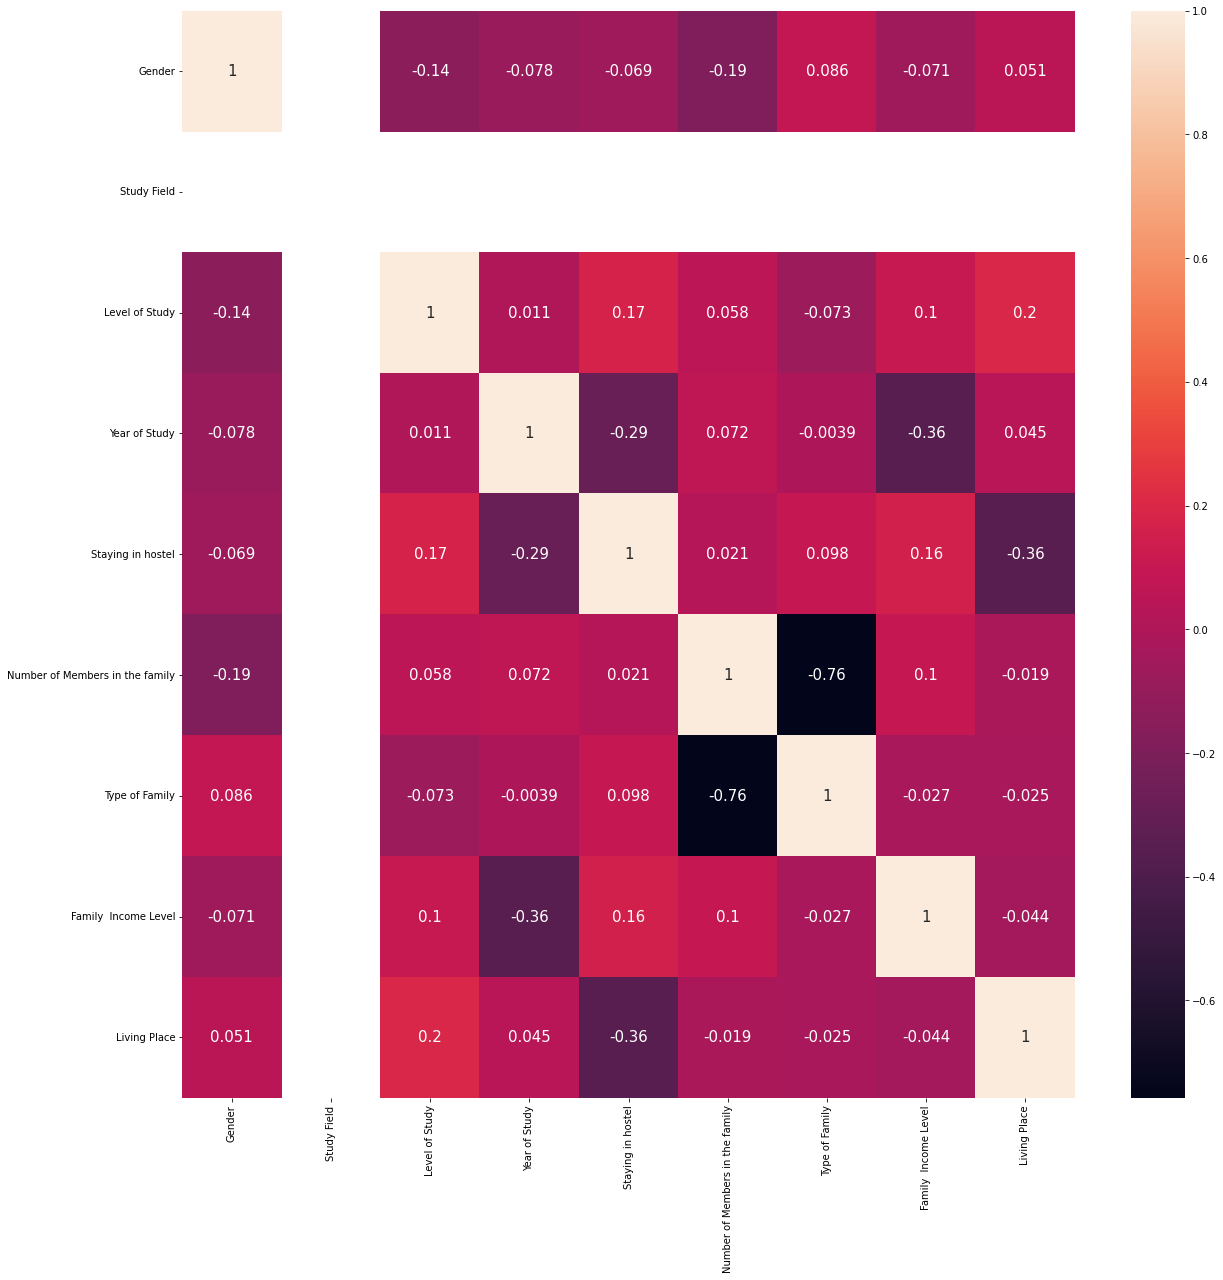

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df11.corr(),annot=True,annot_kws={'size': 15})

In [ ]:
df12 = dfm.iloc[:,11:20]

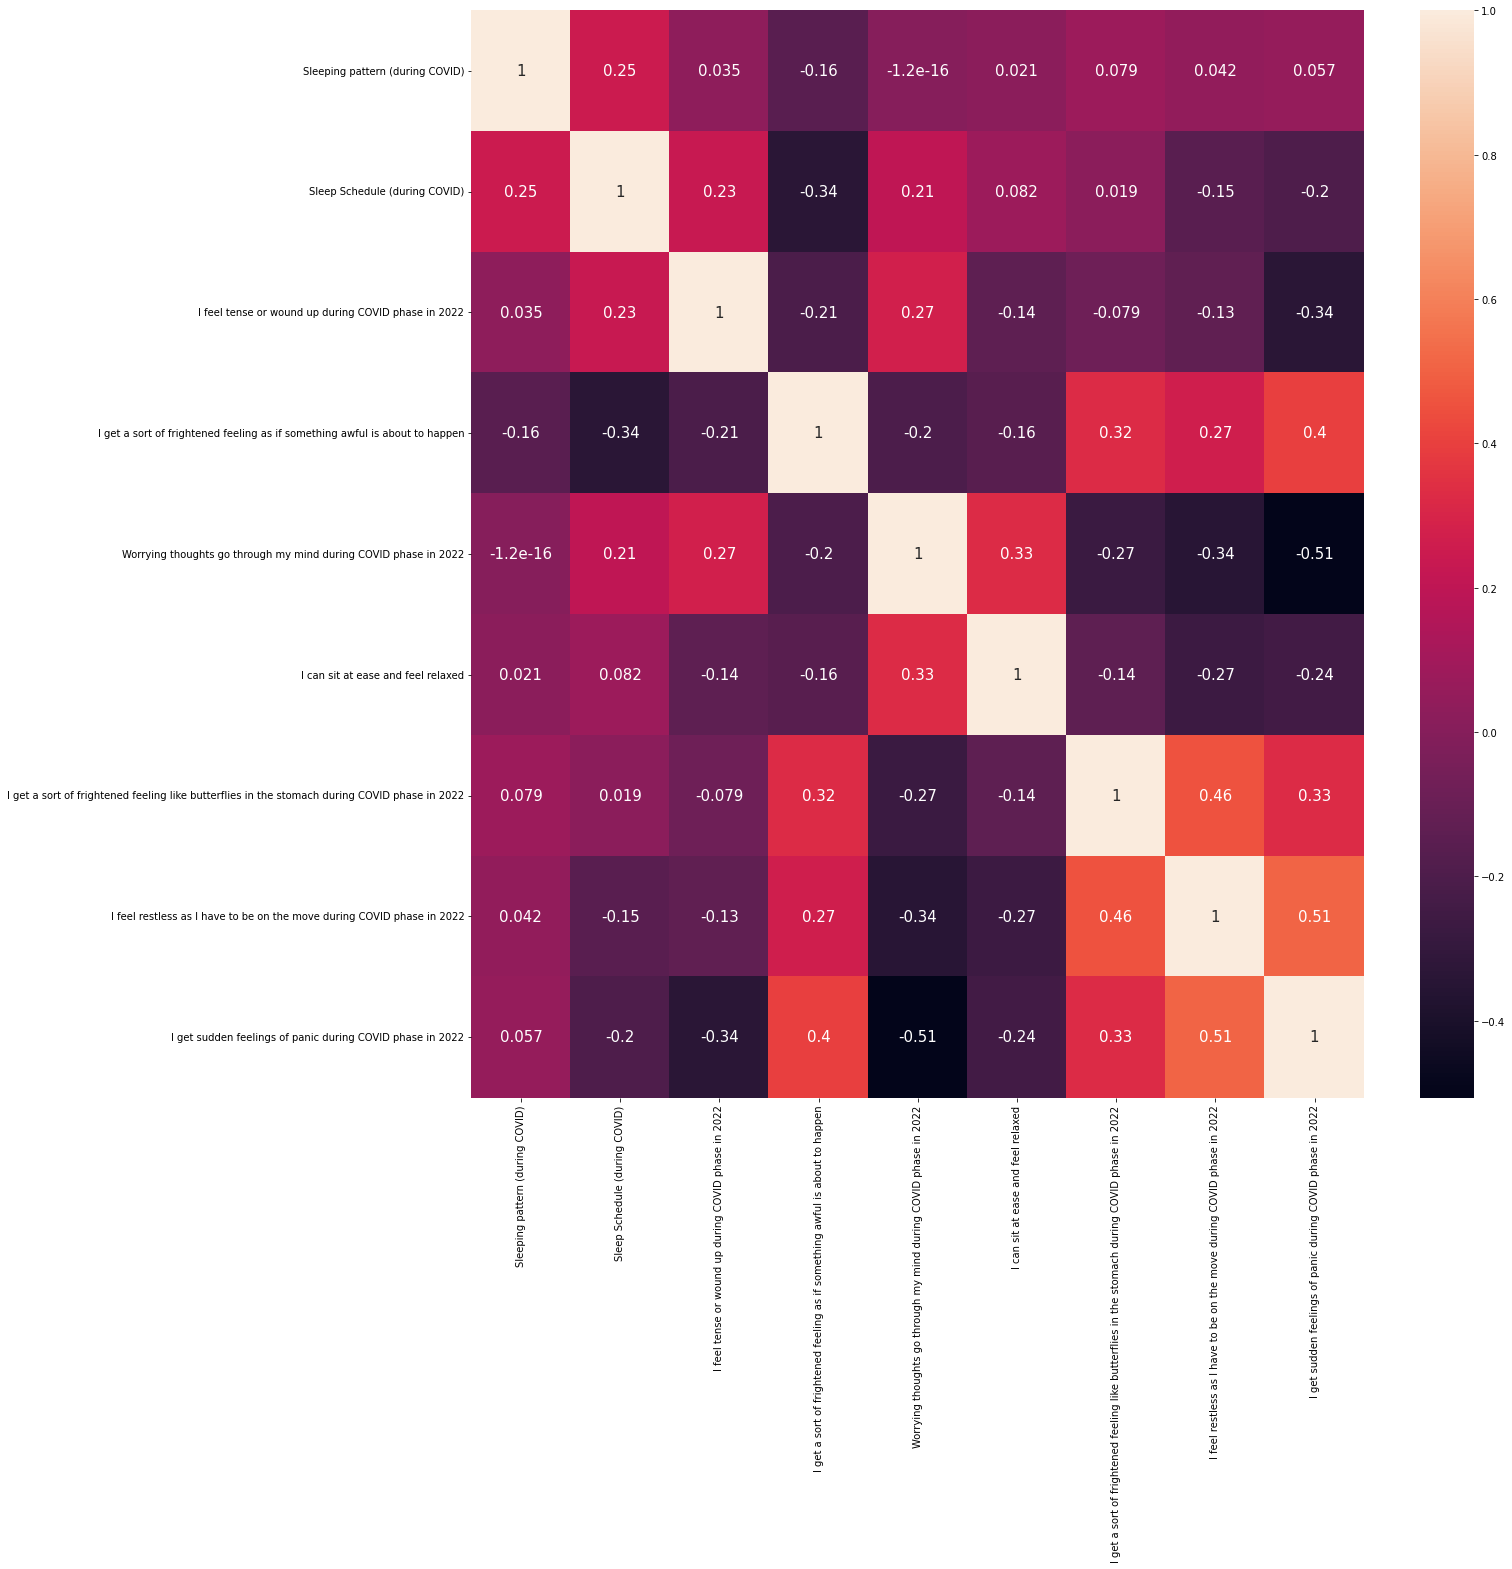

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df12.corr(),annot=True,annot_kws={'size': 15})

In [ ]:
c = dfm.corr().abs()  # sorting the significance of the parameters affecting the Engineering MHA
s = c.unstack()
so = s.sort_values(kind="quicksort")

In [ ]:
print(so)

How do you rank the online learning with regards to the assessment and exams you received last semester compared to offline learning prior COVID and now?  I feel restless as I have to be on the move during COVID phase in 2022                                                                                       1.714783e-17
I feel restless as I have to be on the move during COVID phase in 2022                                                                                     How do you rank the online learning with regards to the assessment and exams you received last semester compared to offline learning prior COVID and now?    1.714783e-17
Sleeping pattern (during COVID)                                                                                                                            How do you rank the online learning with regards to the assessment and exams you received last semester compared to offline learning prior COVID and now?    2.711743e-17
How do you rank the onlin

In [ ]:
dfx['A_D'].value_counts()

Good         62
Treat        31
Monitor      31
Checkup      27
Emergency    24
Counsel      12
Name: A_D, dtype: int64

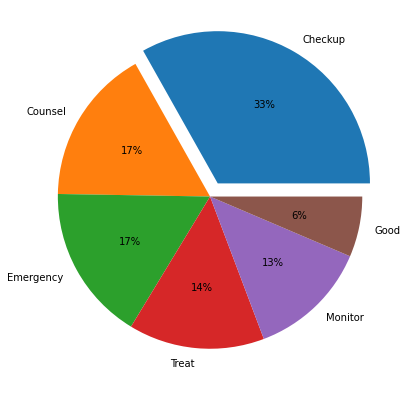

In [ ]:
plt.figure(figsize=(12,7))
# declaring data
data = [62,31,31,27,24,12]
keys = ['Checkup','Counsel','Emergency','Treat','Monitor','Good']

# declaring exploding pie
explode = [0.1, 0, 0, 0, 0,0]
# define Seaborn color palette to use


# plotting data on chart
plt.pie(data, labels=keys,
		explode=explode, autopct='%.0f%%')

# displaying chart
plt.show()

In [ ]:
df['Level of Study'].value_counts()

1    54
0     3
Name: Level of Study, dtype: int64

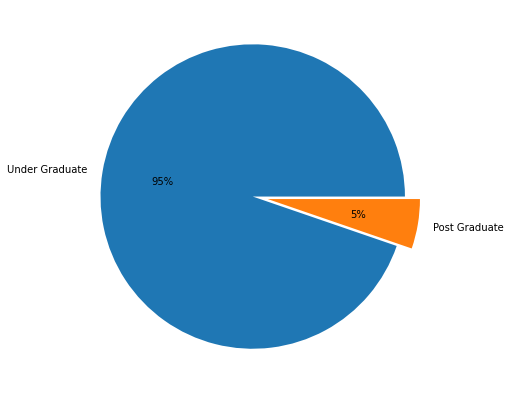

In [ ]:
plt.figure(figsize=(12,7))
# declaring data
data = [54,3]
keys = ['Under Graduate','Post Graduate']

# declaring exploding pie
explode = [0, 0.1]
# define Seaborn color palette to use


# plotting data on chart
plt.pie(data, labels=keys,
		explode=explode, autopct='%.0f%%')

# displaying chart
plt.show()

In [ ]:
df['Family  Income Level'].value_counts()

1    27
2    20
0     7
3     3
Name: Family  Income Level, dtype: int64

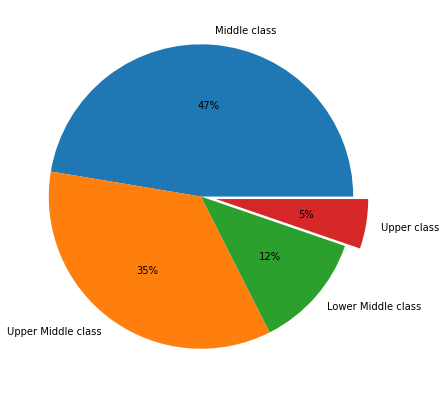

In [ ]:
plt.figure(figsize=(12,7))
# declaring data
data = [27,20,7,3]
keys = ['Middle class','Upper Middle class','Lower Middle class','Upper class']

# declaring exploding pie
explode = [0, 0,0,0.1]
# define Seaborn color palette to use


# plotting data on chart
plt.pie(data, labels=keys,explode=explode, autopct='%.0f%%')

# displaying chart
plt.show()